In [1]:
from lensid.utils.ml_utils import *

# train XGB QTs

In [2]:
tag='_kaggle'
df_dir='../../data/dataframes/train/'
df_lensed_qts = pd.read_csv(df_dir+'lensed_QTs'+tag+'.csv',index_col=[0] )[:2400]
df_unlensed_qts_half = pd.read_csv(df_dir+'unlensed_half_QTs'+tag+'.csv' ,index_col=[0])
df_unlensed_qts_half = df_unlensed_qts_half.sample(frac = 1,random_state = 42).reset_index(drop = True)
df_train_qts = pd.concat([df_lensed_qts,df_unlensed_qts_half],ignore_index = True)
df_train_qts=df_train_qts.sample(frac = 1).reset_index(drop = True)

In [3]:
df_train_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,lsq_overlap_qts_L1,dense_V1_0,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1
128146,216,338,0,0.175701,7817.958496,0.112825,5077.596680,0.303284,7962.839844,0.114714,4513.541504,0.903414,7332.674805,0.106663,5543.719238
128147,213,319,0,0.973979,6280.469727,0.106133,3921.308594,0.077592,6054.168457,0.104848,6549.687500,0.349426,5931.190918,0.102594,5220.391113
128148,188,455,0,0.015824,6463.591309,0.098104,7005.126953,0.002443,6594.300781,0.099968,4793.920898,0.247444,6909.756348,0.103399,5189.920898
128149,300,348,0,0.006970,6966.621582,0.103481,5095.383301,0.049561,6497.344727,0.100932,6112.078613,0.987893,6894.396484,0.110143,4904.252930
128150,6,495,0,0.040472,6196.791016,0.098580,6374.430664,0.015456,6612.184082,0.101914,5504.691406,0.319283,6938.482422,0.103797,5428.244629


In [4]:
xgboost_dense_qts_model=train_xgboost_dense_qts(df_train_qts,from_df=True,scale_pos_weight=1)

In [5]:
joblib_file = 'out/XGBQT_0'+tag+'.pkl'  
joblib.dump(xgboost_dense_qts_model, joblib_file)

['out/XGBQT_0_kaggle.pkl']

# validate XGB QTs

In [6]:
df_lensed_qts = pd.read_csv(df_dir+'lensed_QTs'+tag+'.csv',index_col=[0] )[2400:]
df_unlensed_qts_half = pd.read_csv(df_dir+'unlensed_second_half_QTs'+tag+'.csv' ,index_col=[0])
df_unlensed_qts_half = df_unlensed_qts_half.sample(frac = 1,random_state = 42).reset_index(drop = True)
df_val_qts = pd.concat([df_lensed_qts,df_unlensed_qts_half],ignore_index = True)
df_val_qts=df_val_qts.sample(frac = 1).reset_index(drop = True)

In [7]:
df_val_qts=predict_xgboost_dense_qts(df_val_qts,xgboost_dense_qts_model)

In [8]:
df_val_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,lsq_overlap_qts_L1,dense_V1_0,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1,xgb_dense_QTS_0
126143,568,967,0,0.405071,7511.515625,0.110805,4869.600586,0.787839,7859.310547,0.112108,5248.608398,0.990469,7478.465820,0.110352,4215.986816,0.023403
126144,581,586,0,0.984561,6875.477539,0.110097,4039.968262,0.984760,6890.597168,0.113981,3744.241211,0.666006,7548.191895,0.109857,4869.600586,0.041365
126145,645,986,0,0.308346,6864.183594,0.104678,4736.988281,0.414081,7149.207031,0.111578,4466.498047,0.672974,7083.932617,0.104820,4818.258789,0.001628
126146,806,928,0,0.793549,7811.207520,0.112438,5177.959961,0.245695,7598.564453,0.109227,4768.229492,0.934556,7884.167969,0.110937,5553.671875,0.005327
126147,891,991,0,0.184834,6498.567871,0.103902,3887.355713,0.133550,7238.024414,0.111296,4729.667969,0.119243,7426.878906,0.106730,5701.660156,0.001815


dense_H1_0 auc = 0.9255
dense_L1_0 auc = 0.9266
dense_V1_0 auc = 0.8493
xgb_dense_QTS_0 auc = 0.9521


/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/strong_lensing_ml/ML_utils.py:847: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim, 1)


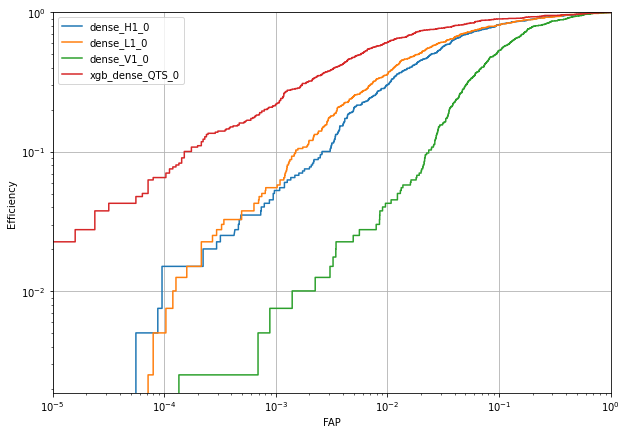

In [9]:
fig=plot_ROCs(df_val_qts,logy=True,cols=['dense_H1_0', 'dense_L1_0', 'dense_V1_0','xgb_dense_QTS_0'])

# cross-validate XGB QTs

In [10]:
df_dir='../../data/dataframes/train/'
df_lensed_qts = pd.read_csv(df_dir+'lensed_QTs'+tag+'.csv',index_col=[0] )[:2400]
df_unlensed_qts_half = pd.read_csv(df_dir+'unlensed_half_QTs'+tag+'.csv' ,index_col=[0])
df_unlensed_qts_second_half = pd.read_csv(df_dir+'unlensed_second_half_QTs'+tag+'.csv' ,index_col=[0])
#df_cv_qts = pd.concat([df_lensed_qts,df_unlensed_qts_half,df_unlensed_qts_second_half],ignore_index = True)
df_cv_qts = pd.concat([df_lensed_qts,df_unlensed_qts_half],ignore_index = True)

df_cv_qts=df_cv_qts.sample(frac = 1).reset_index(drop = True)

In [11]:
df_cv_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,lsq_overlap_qts_L1,dense_V1_0,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1
128146,94,356,0,0.776537,6842.408203,0.105265,4420.730957,0.993104,6724.042969,0.102598,5254.814453,0.586427,7850.541992,0.114225,5195.162109
128147,49,315,0,0.842959,7526.673340,0.111564,4917.533691,0.133656,7274.893555,0.108548,4645.865234,0.848345,7620.961914,0.111573,5028.229004
128148,97,363,0,0.336617,7448.536133,0.108674,4646.288574,0.098854,7404.046387,0.107640,4732.699219,0.002749,7219.793945,0.106028,5618.454590
128149,161,295,0,0.179267,7289.276367,0.110061,4300.181641,0.000780,6792.494629,0.102396,4405.564941,0.668530,7515.661133,0.109221,4859.988281
128150,165,425,0,0.227210,7061.797852,0.106250,5068.284180,0.074521,7579.095215,0.110244,4987.450684,0.000297,7229.333984,0.107666,4647.079102


In [12]:
cv = StratifiedKFold(n_splits = 10)


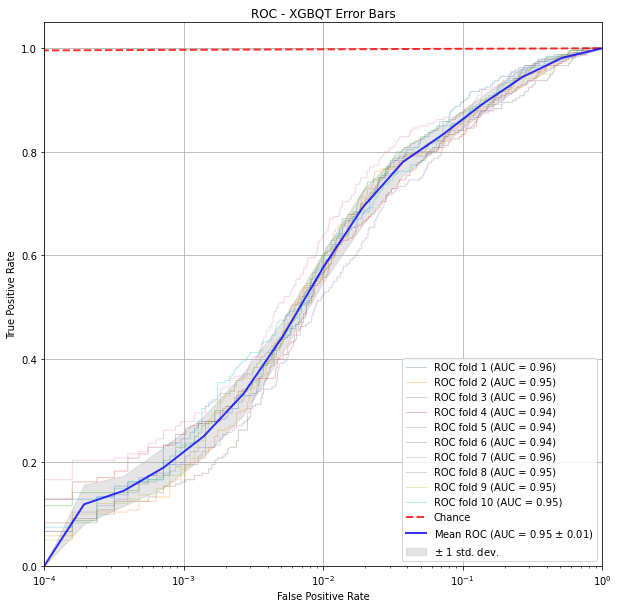

In [13]:
xgboost_dense_qts_models=[]
plt.rcParams["figure.figsize"] = (10,10)

tprs = []
aucs = []

mean_fpr = 10**np.linspace(-4,0,15)
fig,ax = plt.subplots()
cols=['dense_H1_0','dense_L1_0','dense_V1_0']
for i,(train_index, test_index) in enumerate(cv.split(df_cv_qts,df_cv_qts.Lensing.values)):
    xgboost_dense_qts_model=train_xgboost_dense_qts(df_cv_qts.iloc[train_index],from_df=True,n_estimators=135,
                      max_depth = 6, scale_pos_weight=1)
    joblib_file = "out/XGBQT_"+str(i+1)+tag+ ".pkl"  
    joblib.dump(xgboost_dense_qts_model, joblib_file)
    X=np.c_[df_cv_qts.iloc[test_index][cols]]
    viz = plot_roc_curve(xgboost_dense_qts_model,X,df_cv_qts.Lensing.values[test_index],name="ROC fold {}".format(i+1),alpha=0.3,lw=1,ax=ax)
    interp_tpr = np.interp(mean_fpr,viz.fpr,viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
        
ax.plot([0,1],[0,1],linestyle="--",lw = 2,color="r",label="Chance",alpha=0.8)
mean_tpr = np.mean(tprs,axis = 0)
mean_tpr[-1]=1.0
mean_auc = auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr,mean_tpr,color='b',label = r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc , std_auc),lw = 2,alpha=.8)
    
std_tpr = np.std(tprs,axis=0)
tprs_upper = np.minimum(mean_tpr +std_tpr,1)
tprs_lower = np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr,tprs_lower,tprs_upper,color="grey",alpha=.2,label=r'$\pm$ 1 std. dev.')
    
ax.set(xlim=[1e-4,1],ylim=[0,1.05],
          title = "ROC - XGBQT Error Bars",xscale='log')
ax.legend(loc ="lower right")
#plt.savefig('ROC-XGB_QT'+tag+'.png')
plt.grid()
plt.show()

# Testing(debugging)

In [19]:
tag=''#'_kaggle'
df_dir='../../data/dataframes/test/'
df_lensed_qts = pd.read_csv(df_dir+'lensed_QTs'+tag+'.csv',index_col=[0] )
df_unlensed_qts = pd.read_csv(df_dir+'unlensed_QTs'+tag+'.csv' ,index_col=[0])
blu_lensed = '../../data/dataframes/haris_et_al/Lensed_PE_blus.csv'
blu_unlensed = '../../data/dataframes/haris_et_al/Unlensed_PE_blus.csv'

df_test_blu_lensed = pd.read_csv(blu_lensed,index_col=[0] )
df_test_blu_unlensed = pd.read_csv(blu_unlensed,index_col=[0] )
cols=['m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2']
df_lensed_qts=df_lensed_qts.join(df_test_blu_lensed[cols])
df_unlensed_qts=df_unlensed_qts.join(df_test_blu_unlensed[cols])
df_test_qts = pd.concat([df_lensed_qts,df_unlensed_qts],ignore_index = True)
df_test_qts=df_test_qts.sample(frac = 1).reset_index(drop = True)

In [20]:
df_test_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,...,dense_V1_0,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec","# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2","m1, m2, ra, sin_dec","m1, m2"
499787,638384500.000000000-276769,641477500.000000000-282955,0,0.003649,6786.803223,0.102967,5418.988281,0.003386,8122.279297,0.115613,...,0.984031,7966.206055,0.116168,4857.045898,8.859582e-05,2.161099e-07,5.098511e+00,9.998405e-03,4.875208e-04,1.012815e-03
499788,548706500.000000000-97413,657293500.000000000-314587,0,0.000950,6302.497559,0.096295,4318.363281,0.011104,6620.815918,0.099371,...,0.043814,7063.068359,0.106335,4529.762695,3.954678e-37,2.794587e-54,4.057024e-91,3.588693e-41,3.729598e-68,2.042594e-01
499789,517846000.000000000-35692,649949500.000000000-299899,0,0.000126,6873.297852,0.102053,4282.679688,0.467229,6860.713867,0.103269,...,0.097094,7331.037598,0.107972,4579.968262,2.733269e-01,8.225627e-01,1.272269e+00,3.305002e-01,7.940158e-01,1.035337e+00
499790,674124000.000000000-348248,657395500.000000000-314791,0,0.000013,6359.595703,0.098799,4678.592773,0.000012,6787.157227,0.101421,...,0.025837,7758.750000,0.112064,4979.932617,7.098277e-60,9.838406e-91,5.698497e-17,1.961017e-67,3.159221e-117,4.813898e-169
499791,642416000.000000000-284832,691389500.000000000-382779,0,0.000124,6281.479492,0.097260,5616.004395,0.560195,7611.321289,0.111182,...,0.001795,7169.093750,0.106021,4623.727051,1.574384e-07,6.110102e-05,2.243034e-02,3.997099e-07,3.535020e-05,1.926115e-05


In [21]:
xgboost_dense_qts_model = joblib.load('out/XGBQT_0'+tag+'.pkl')

In [22]:
df_test_qts=predict_xgboost_dense_qts(df_test_qts,xgboost_dense_qts_model)
df_test_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,...,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec","# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2","m1, m2, ra, sin_dec","m1, m2",xgb_dense_QTS_0
499787,638384500.000000000-276769,641477500.000000000-282955,0,0.003649,6786.803223,0.102967,5418.988281,0.003386,8122.279297,0.115613,...,7966.206055,0.116168,4857.045898,8.859582e-05,2.161099e-07,5.098511e+00,9.998405e-03,4.875208e-04,1.012815e-03,0.002554
499788,548706500.000000000-97413,657293500.000000000-314587,0,0.000950,6302.497559,0.096295,4318.363281,0.011104,6620.815918,0.099371,...,7063.068359,0.106335,4529.762695,3.954678e-37,2.794587e-54,4.057024e-91,3.588693e-41,3.729598e-68,2.042594e-01,0.003077
499789,517846000.000000000-35692,649949500.000000000-299899,0,0.000126,6873.297852,0.102053,4282.679688,0.467229,6860.713867,0.103269,...,7331.037598,0.107972,4579.968262,2.733269e-01,8.225627e-01,1.272269e+00,3.305002e-01,7.940158e-01,1.035337e+00,0.002045
499790,674124000.000000000-348248,657395500.000000000-314791,0,0.000013,6359.595703,0.098799,4678.592773,0.000012,6787.157227,0.101421,...,7758.750000,0.112064,4979.932617,7.098277e-60,9.838406e-91,5.698497e-17,1.961017e-67,3.159221e-117,4.813898e-169,0.000224
499791,642416000.000000000-284832,691389500.000000000-382779,0,0.000124,6281.479492,0.097260,5616.004395,0.560195,7611.321289,0.111182,...,7169.093750,0.106021,4623.727051,1.574384e-07,6.110102e-05,2.243034e-02,3.997099e-07,3.535020e-05,1.926115e-05,0.002310


In [23]:
df_test_qts=df_test_qts.dropna()

ML H1 QTs auc = 0.8581
ML L1 QTs auc = 0.8613
ML V1 QTs auc = 0.7947
ML combined H1 L1 V1 QTS auc = 0.8640
$B^L_U:$ $m_1 m_2$ auc = 0.9164


../src/ML_utils.py:847: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim, 1)


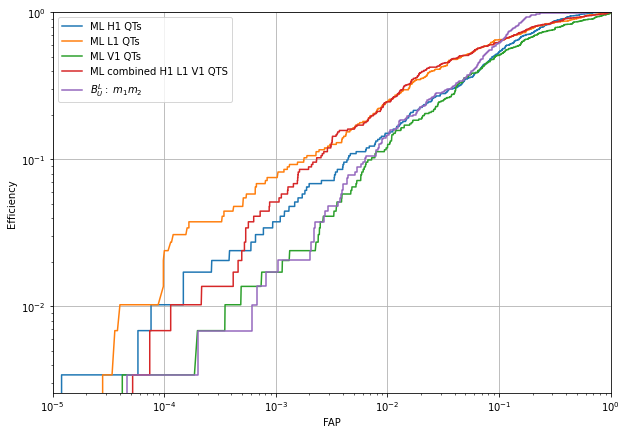

In [24]:
fig=plot_ROCs(df_test_qts,cols=['dense_H1_0' ,'dense_L1_0','dense_V1_0','xgb_dense_QTS_0','m1, m2']\
                     ,labels=['ML H1 QTs', 'ML L1 QTs', 'ML V1 QTs','ML combined H1 L1 V1 QTS', '$B^L_U:$ $m_1 m_2$'],logy=True)

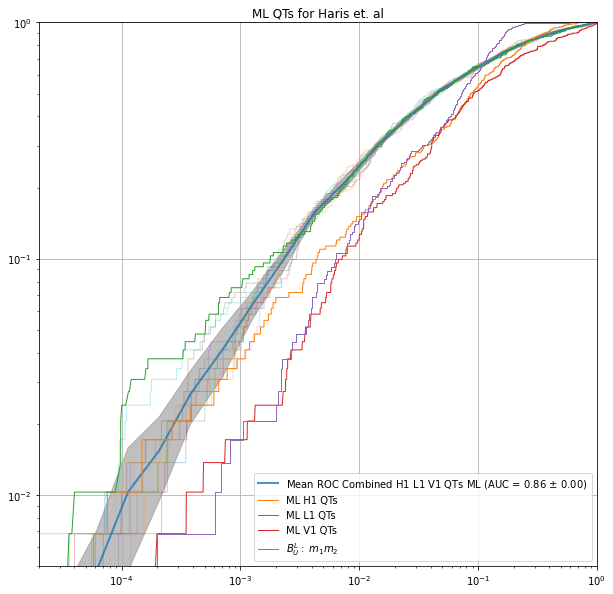

In [25]:
from sklearn.metrics import plot_roc_curve
plt.rcParams["figure.figsize"] = (10,10)

tprs = []
aucs = []

mean_fpr = 10**np.linspace(-5,0,20)
    
fig,ax = plt.subplots()
cols=['dense_H1_0','dense_L1_0','dense_V1_0']

for i in range(1,11):
    xgb_qt_cv = joblib.load("../training_cv/out/XGBQT_"+str(i)+tag+".pkl")
    df = predict_xgboost_dense_qts(df_test_qts,xgb_qt_cv)
    df_test_qts['xgb_dense_QTS_' +str(i) ]=df['xgb_dense_QTS_0']

    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test_qts.Lensing.values, df_test_qts['xgb_dense_QTS_' +str(i)])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    ax.plot(false_positive_rate,true_positive_rate,alpha=0.3,lw=1)
    interp_tpr = np.interp(mean_fpr,false_positive_rate,true_positive_rate)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    

    
mean_tpr = np.mean(tprs,axis = 0)
mean_tpr[-1]=1.0
mean_auc = auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr,mean_tpr,label = r'Mean ROC Combined H1 L1 V1 QTs ML (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc , std_auc),lw = 2,alpha=.8)
    
std_tpr = np.std(tprs,axis=0)
tprs_upper = np.minimum(mean_tpr +std_tpr,1)
tprs_lower = np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr,tprs_lower,tprs_upper,color="grey",alpha=.5)


colors=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
cols=['dense_H1_0' ,'dense_L1_0','dense_V1_0','m1, m2']

labels=['ML H1 QTs', 'ML L1 QTs', 'ML V1 QTs', '$B^L_U:$ $m_1 m_2$']

for i,col in enumerate(cols):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test_qts.Lensing.values, df_test_qts[col])
    plt.plot(false_positive_rate,true_positive_rate,'-',label=labels[i],lw=1)

#ax.set(xlim=[2e-5,1],ylim=[-0.05,1.05],title = "ML Skymaps for Haris et. al",xscale='log')

ax.set(xlim=[2e-5,1],ylim=[5e-3,1],title = "ML QTs for Haris et. al",xscale='log',yscale='log')
ax.grid()
ax.legend(loc ="lower right")
#plt.savefig('ROC-log-QTs-xgb'+tag+'.png')

plt.show()


In [26]:
df_test_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,...,xgb_dense_QTS_1,xgb_dense_QTS_2,xgb_dense_QTS_3,xgb_dense_QTS_4,xgb_dense_QTS_5,xgb_dense_QTS_6,xgb_dense_QTS_7,xgb_dense_QTS_8,xgb_dense_QTS_9,xgb_dense_QTS_10
499787,638384500.000000000-276769,641477500.000000000-282955,0,0.003649,6786.803223,0.102967,5418.988281,0.003386,8122.279297,0.115613,...,0.002450,0.000407,0.000570,0.001056,0.000633,0.004689,0.001511,0.003518,0.001963,0.001554
499788,548706500.000000000-97413,657293500.000000000-314587,0,0.000950,6302.497559,0.096295,4318.363281,0.011104,6620.815918,0.099371,...,0.011103,0.004884,0.004166,0.000915,0.005342,0.009156,0.004451,0.008987,0.008887,0.001418
499789,517846000.000000000-35692,649949500.000000000-299899,0,0.000126,6873.297852,0.102053,4282.679688,0.467229,6860.713867,0.103269,...,0.001698,0.003075,0.003991,0.007461,0.001405,0.001817,0.002241,0.004785,0.000405,0.007101
499790,674124000.000000000-348248,657395500.000000000-314791,0,0.000013,6359.595703,0.098799,4678.592773,0.000012,6787.157227,0.101421,...,0.000175,0.000167,0.000154,0.000243,0.000452,0.000188,0.000188,0.000149,0.000032,0.000116
499791,642416000.000000000-284832,691389500.000000000-382779,0,0.000124,6281.479492,0.097260,5616.004395,0.560195,7611.321289,0.111182,...,0.003005,0.002513,0.001685,0.007874,0.001509,0.003918,0.009972,0.001306,0.001962,0.006157


In [27]:
df_test_qts.to_csv('../../data/dataframes/test/ML_qts'+tag+'.csv')

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


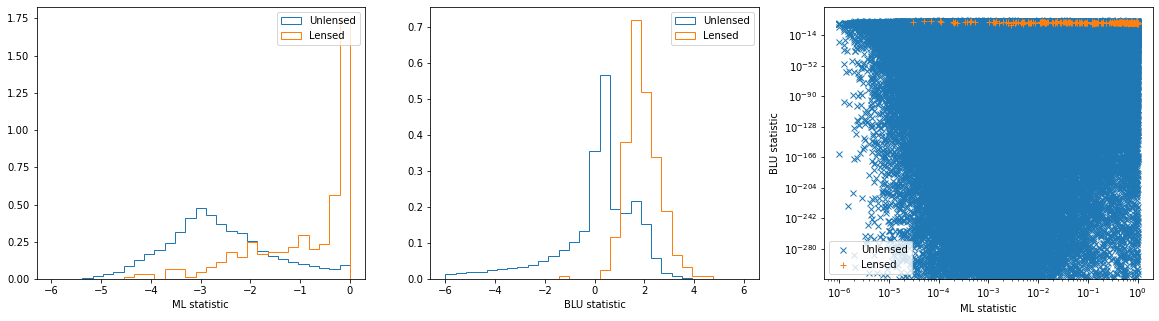

In [28]:
df_test=df_test_qts
ml_stat='xgb_dense_QTS_0'
blu_stat= 'm1, m2'
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.xlabel('ML statistic')
bins=np.linspace(-6,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
#plt.ylim(0,300)
plt.subplot(132)
plt.xlabel('BLU statistic')
bins=np.linspace(-6,6,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
#plt.ylim(0,300)
plt.subplot(133)

plt.xlabel('ML statistic')
plt.ylabel('BLU statistic')
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat],df[blu_stat],'x',label='Unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat],df[blu_stat],'+',label='Lensed')
plt.legend()
plt.show()


/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


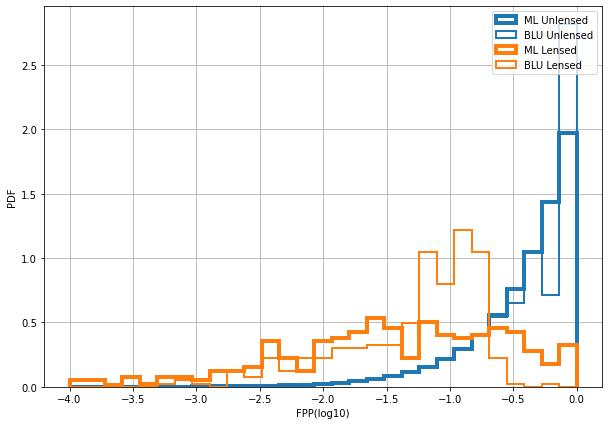

In [29]:
plt.figure(figsize=(10,7))
df_test[ml_stat+'_fpp']=get_fars(df_test,ml_stat,df_test,ml_stat)
df_test[blu_stat+'_fpp']=get_fars(df_test,blu_stat,df_test,blu_stat)
bins=np.linspace(-4,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()
plt.show()

ML H1 QTs auc = 0.8581
ML L1 QTs auc = 0.8613
ML V1 QTs auc = 0.7947
ML combined H1 L1 V1 QTS auc = 0.8641
$B^L_U:$ $m_1 m_2$ auc = 0.9164


../src/ML_utils.py:847: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim, 1)


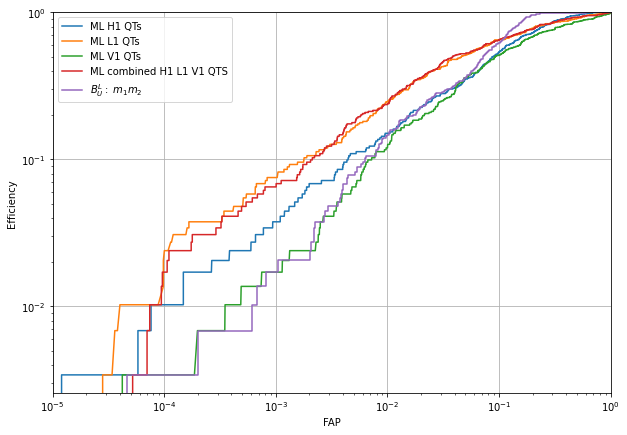

In [30]:
fig,rocs=plot_ROCs(df_test_qts,cols=['dense_H1_0' ,'dense_L1_0','dense_V1_0','xgb_dense_QTS_0','m1, m2']\
                     ,labels=['ML H1 QTs', 'ML L1 QTs', 'ML V1 QTs','ML combined H1 L1 V1 QTS', '$B^L_U:$ $m_1 m_2$'],logy=True)

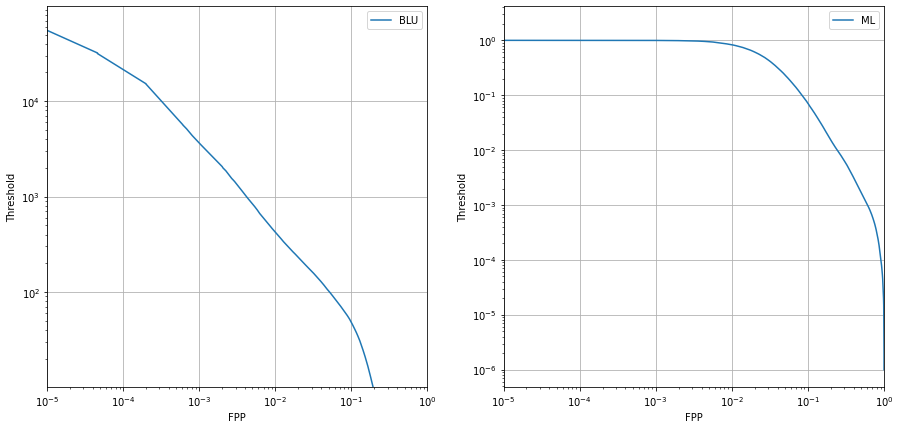

In [31]:
fpp_blu,eff_blu,thr_blu=rocs[blu_stat]
fpp_ml,eff_ml,thr_ml=rocs[ml_stat]

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(fpp_blu,thr_blu,label='BLU')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.ylim(np.percentile(thr_blu,10),np.max(thr_blu))
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.grid()
plt.subplot(122)
plt.plot(fpp_ml,thr_ml,label='ML')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.show()

In [ ]:
#df_test_qts.to_csv('../../data/dataframes/test/ML_qts'+tag+'.csv')